Connected to Python 3.10.11

In [1]:
# -*- coding: utf-8 -*-
#%%
import matplotlib.pyplot as plt
#plt.style.use('paper.mplstyle')

from MR_env_ddpg import MR_env
from DDPG_new import DDPG
from gru_pred import gru_pred
#from main_gru_pred import model

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

model = gru_pred(T=100, 
                 learning_rate = 0.001,
                 seq_length=100, n_ahead=1, 
                 gru_hidden_size = 10, gru_num_layers = 10,
                 dropout_rate=0, kappa=5, sigma=0.3, dt=0.1)

env = MR_env(S_0 = model.env.S_0 , kappa = model.env.kappa, sigma = model.env.sigma, theta = model.env.theta,
             dt = model.env.dt, T = model.env.T, 
             I_max = 10, lambd = 0.05)

ddpg = DDPG(env, gru = model, I_max = 10,
            gamma = 0.999, 
            lr= 0.001,
            n_nodes=20, n_layers=10, 
            name="test" )

  2%|▏         | 199/10000 [00:37<29:52,  5.47it/s]c:\Users\macri\Desktop\ddpg-stat-arb\pair_trading\DDPG_new.py:368: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.tight_layout()


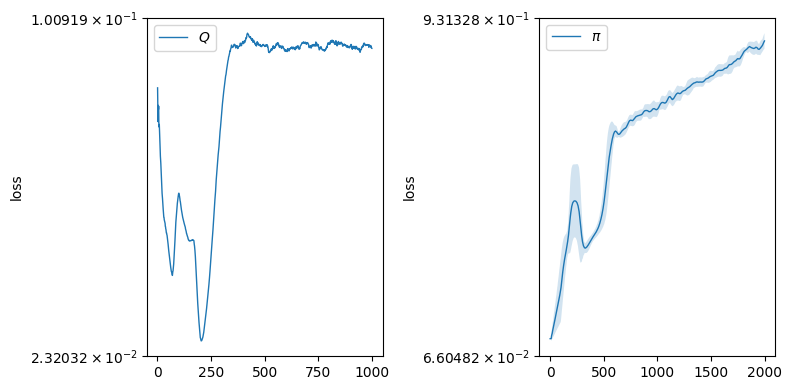

c:\Users\macri\Desktop\ddpg-stat-arb\pair_trading\DDPG_new.py:386: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3618.)
  X = self.__stack_state__(S[:, t+self.seq_length-1].T, I[:, t+self.seq_length-1].T, theta_post)


<Figure size 500x500 with 0 Axes>

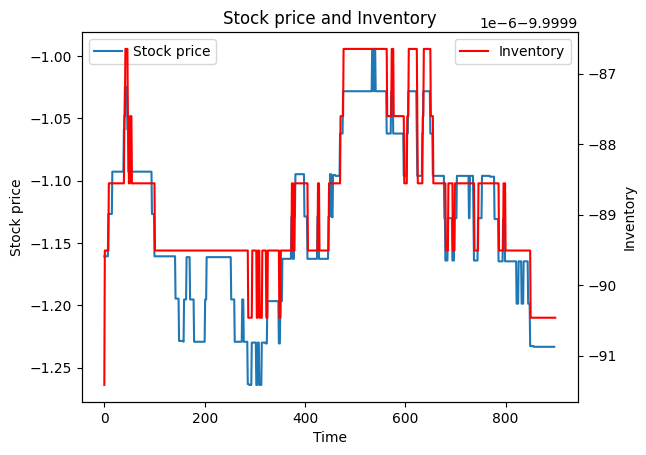

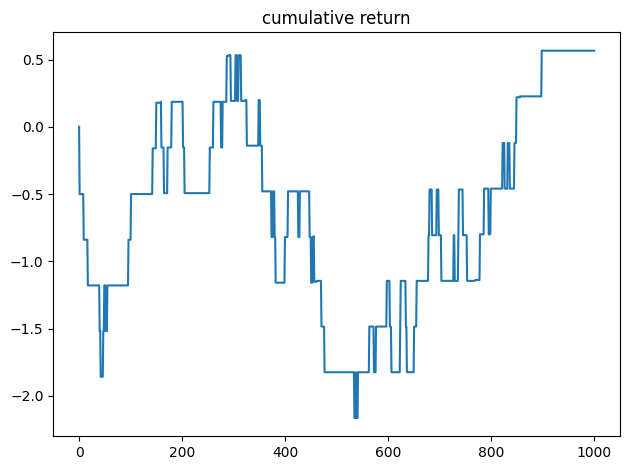

  2%|▏         | 200/10000 [00:40<2:31:53,  1.08it/s]

3.505266624882867e-05


  4%|▍         | 399/10000 [01:17<29:19,  5.46it/s]  c:\Users\macri\Desktop\ddpg-stat-arb\pair_trading\DDPG_new.py:368: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.tight_layout()


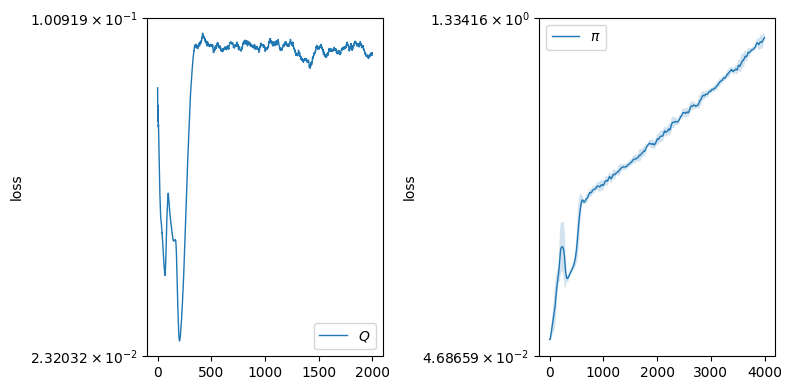

<Figure size 500x500 with 0 Axes>

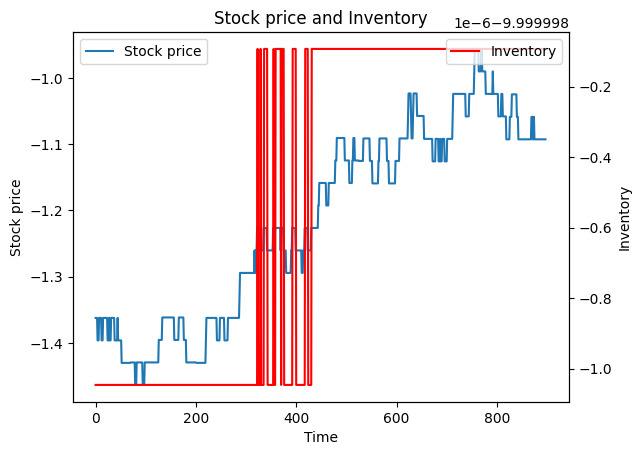

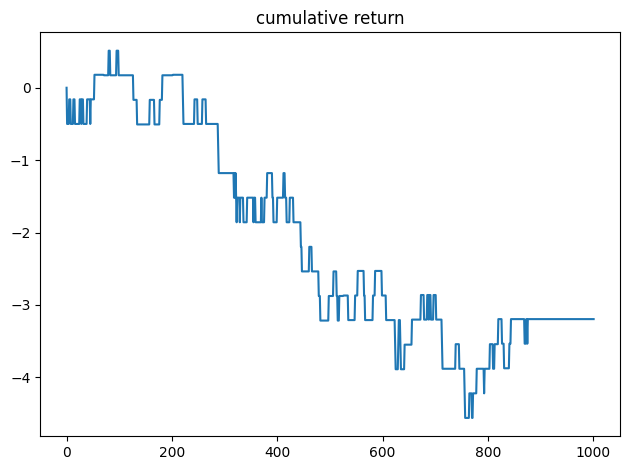

  4%|▍         | 400/10000 [01:20<2:21:56,  1.13it/s]

1.2286894111517717e-09


  6%|▌         | 599/10000 [01:58<32:07,  4.88it/s]  c:\Users\macri\Desktop\ddpg-stat-arb\pair_trading\DDPG_new.py:368: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.tight_layout()


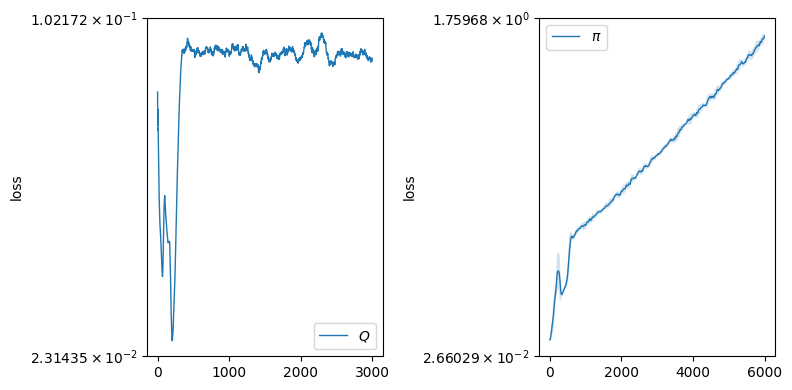

<Figure size 500x500 with 0 Axes>

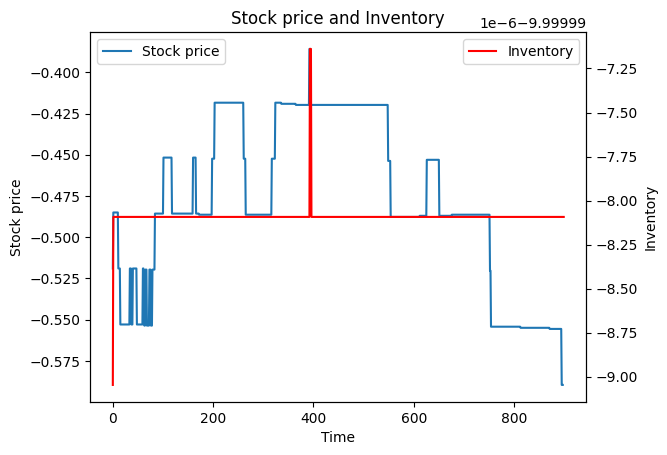

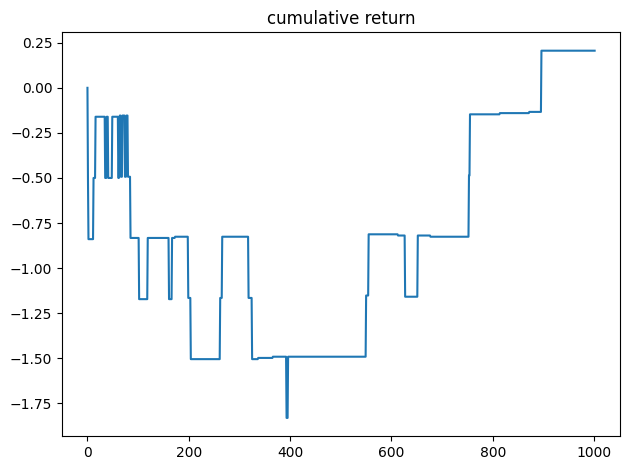

  6%|▌         | 600/10000 [02:01<2:43:07,  1.04s/it]

4.306883985257291e-14


  8%|▊         | 799/10000 [02:44<39:08,  3.92it/s]  c:\Users\macri\Desktop\ddpg-stat-arb\pair_trading\DDPG_new.py:368: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.tight_layout()


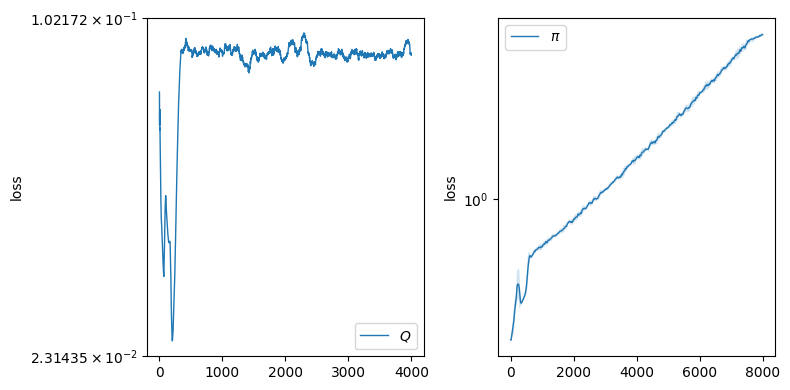

<Figure size 500x500 with 0 Axes>

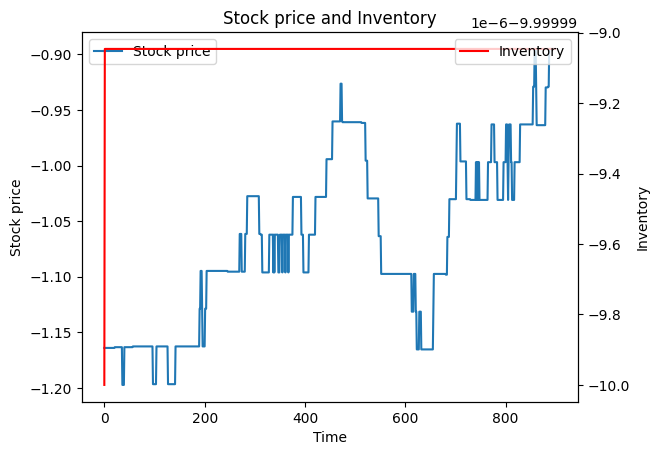

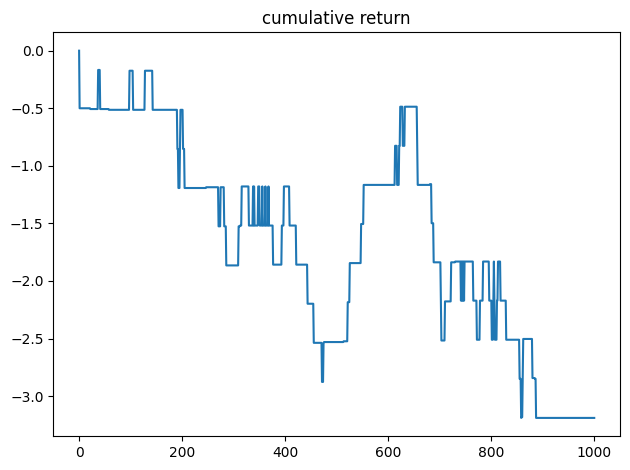

  8%|▊         | 800/10000 [02:48<2:49:39,  1.11s/it]

1.5096776690764913e-18


 10%|▉         | 999/10000 [03:26<28:45,  5.22it/s]  c:\Users\macri\Desktop\ddpg-stat-arb\pair_trading\DDPG_new.py:368: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.tight_layout()


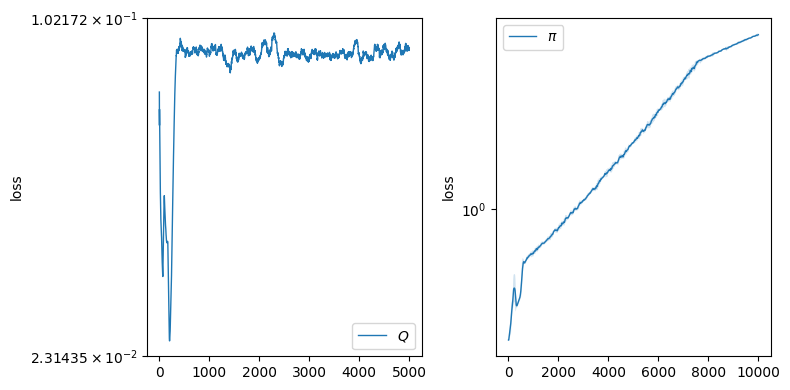

<Figure size 500x500 with 0 Axes>

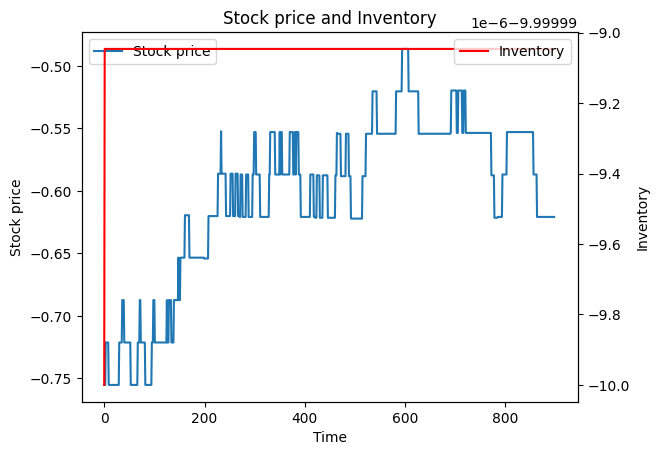

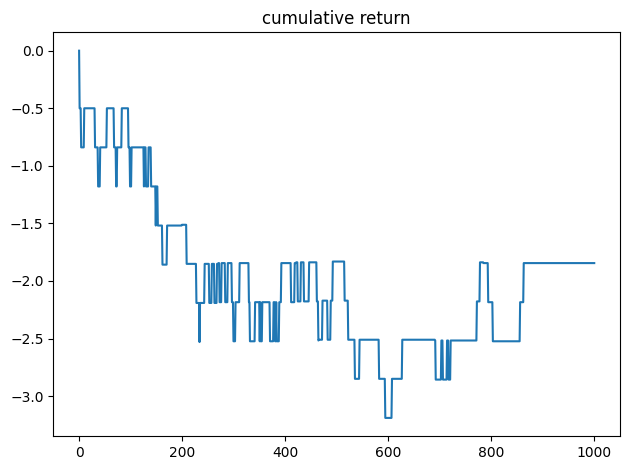

 10%|█         | 1000/10000 [03:29<2:28:54,  1.01it/s]

5.291822747744796e-23


 10%|█         | 1023/10000 [03:34<29:36,  5.05it/s]  

In [2]:
ddpg.train(n_iter=10_000, n_iter_Q = 5, n_iter_pi = 10, n_plot=200, mini_batch_size=64)

#import torch
#torch.save(ddpg.pi['net'].state_dict(), 'pi.pth')
#torch.save(ddpg.Q_main['net'].state_dict(), 'Q.pth')